# Linear Regression and Learning Curve challenges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
x = [x/10. for x in range(1, 1001, 1)]
beta0 = -3
beta1 = .78
y = [beta0 + beta1 * math.log(n) + random.random() for n in x]
data = pd.DataFrame({'y':y, 'x':x})

In [3]:
model = sm.OLS(y, x)

In [4]:
data['constant'] = 1
data['x2'] = data['x']**2
# quadratic_fit = np.polyfit(x, y, 2)
quadratic = smf.ols(formula = 'y ~ x2', data=data).fit()
y_pred = quadratic.predict(data[['constant', 'x2']])
quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     999.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):          1.64e-152
Time:                        09:47:54   Log-Likelihood:                -867.21
No. Observations:                1000   AIC:                             1738.
Df Residuals:                     998   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3358      0.027    -12.274      0.000      -0.389      -0.282
x2             0.0002   6.11e-06     31.609      0.000       0.000       0.000
==============================================================================
Omnibus:                      436.528   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2843.790
Skew:                          -1.886   Prob(JB):                         0.00
Kurtosis:                      10.350   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
data.head(2)

,y,x,constant,x2
0,-4.583002,0.1,1,0.01
1,-3.289789,0.2,1,0.04


Quadratic Fit


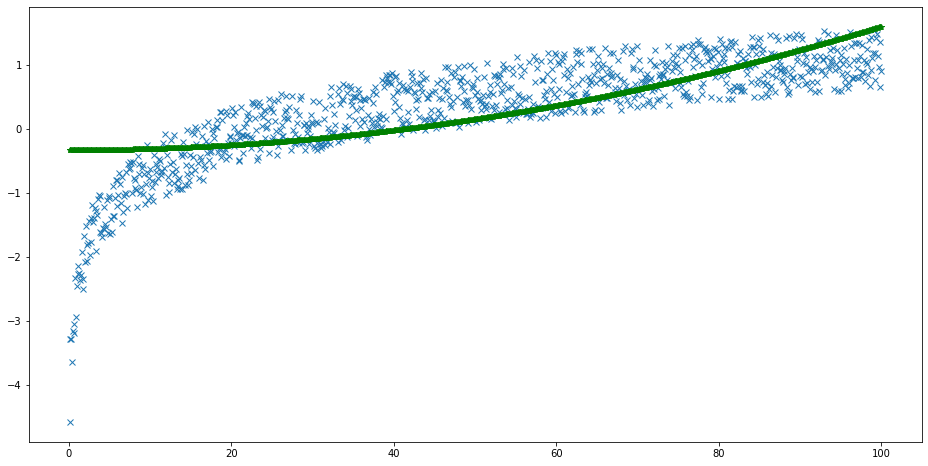

In [6]:
plt.figure(figsize=(16,8))
plt.plot(data.x, data.y, 'x', data.x, y_pred, 'g*')
print('Quadratic Fit')

## Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

## Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

## Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.